<a href="https://colab.research.google.com/github/jimwellh/NYCU-Introduction-to-Data-science/blob/main/0811033_%E9%BB%83%E5%8B%81%E7%91%8B_hw06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Science** Homework 6
0811033_黃勁瑋_hw06\
2023/11/05


*   Use R, Python, and suitable computer packages to perform different types of Regression
Models (Ex: Parametric and non-parametric regression).
*   Explain the results you obtain.
*   Compare the results you obtain by different regression approaches.
*   Discuss possible problems you plan to investigate for future studies

In this homework I decide to analyze the Used Cars Prices in UK dataset from Kaggle. The data I laod if preprocessed usong the code from homework 5.  

**Load the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
df_org= pd.read_csv('/content/drive/MyDrive/Introduction to Data science/Data sets/used_cars_UK.csv')
df = pd.read_csv('/content/drive/MyDrive/Introduction to Data science/Data sets/modified_used_cars_UK.csv')
#check is the data is read successfully
print(df.head(10))
print(df.shape)
df=df.drop(columns=["Unnamed: 0","title"])
print(df.head(10))
print(df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0              title  Price  Mileage(miles)  Registration_Year  \
0           0        SKODA Fabia   6900           70189               2016   
1           1     Vauxhall Corsa   1495           88585               2008   
2           3         MINI Hatch   2395           96731               2010   
3           5      Hyundai Coupe    800          124196               2007   
4           9        Peugeot 207   1299           87000               2008   
5          11  Vauxhall Insignia   2950           79000               2011   
6          12        SKODA Fabia   6900           70189               2016   
7          13       BMW 3 Series  19800           69690               2019   
8          16        Peugeot 207    999          111400               2007   
9          18     Vauxhall Astra   1200          134000               2004   

   Previous 

The target of this data is the car price, which is continuous. The features can be either continuous or discrete.

**Categoricals transformation**

In [ ]:
df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Service history
count,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000
mean,5985.982574,82471.999106,2012.312779,2.804736,1.602904,0.180518
std,4761.720505,36425.636181,4.707305,1.540929,0.466926,0.384705
min,400.000000,6.000000,1993.000000,1.000000,0.800000,0.000000
25%,2450.000000,58348.000000,2009.000000,2.000000,1.300000,0.000000
50%,4250.000000,80000.000000,2012.000000,3.000000,1.600000,0.000000
75%,8493.000000,105000.000000,2016.000000,4.000000,1.975000,0.000000
max,33900.000000,274100.000000,2023.000000,9.000000,6.300000,1.000000


In [ ]:
df1_categoricals = df.select_dtypes(['object','bool'])
categoricals = [i for i in df1_categoricals.columns]
label_encoder = LabelEncoder()
for column in categoricals:
    df[column] = label_encoder.fit_transform(df[column])

**Modeling**

Import libraries




In [ ]:
from math import sqrt
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import classification_report, confusion_matrix
np.seterr(divide='ignore', invalid='ignore', over='ignore')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

Define training and test set randomly.

Since the main part of this homework is to compare the results obtained by different regression approaches, the data is split into 2 sets which are training and test set. Training set has 75% of the data and is used to train the model; Test set has 25% of the data and is used to compare and evaluate each model.   

In [ ]:
X = df.drop(columns=["Price"])
y = df["Price"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

ANOVA

In [ ]:
F,pval=f_classif(X, y)
print("F-statistic for each feature is\n",F)
print("P-values associated with the F-statistic is\n",pval)

F-statistic for each feature is
 [3.54244491 9.42949242 2.4357714  2.33598135 1.94209035 1.61554262
 2.16273002 6.16524315 2.47238943 1.84241304 2.02456564]
P-values associated with the F-statistic is
 [3.10663421e-093 5.42657940e-288 2.15191303e-046 3.29799698e-042
 2.98245077e-026 2.18993370e-014 4.73679290e-035 7.41335590e-192
 6.14753401e-048 1.89896487e-022 1.73080036e-029]


As we can see from the ANOVA result, the p value is a lot samller than 0.05. The result deny the null hypothesis. That is, all the features we selected for the model could be criticle for the result and should be considered when building the model.  

Define model_prediction function to visualize the prediction result and to compare different models  

In [ ]:
def model_prediction(model):
    model.fit(X_train,y_train)
    X_train_pred = model.predict(X_train)
    X_test_pred = model.predict(X_test)

    n = X_test.shape[0]
    p = X_test.shape[1]
    r2_adj=1-(1-r2_score(y_test, X_test_pred))*(n-1)/(n-p-1)


    # The mean squared error
    print("Root mean squared error: %.2f"
          % sqrt(mean_squared_error(y_test, X_test_pred)))
    # The absolute squared error
    print("Mean absolute error: %.2f"
          % mean_absolute_error(y_test, X_test_pred))
    # Explained variance score: 1 is perfect prediction
    print('R-squared: %.2f' % r2_score(y_test, X_test_pred))

    # Explained adjusted r^2:
    print('Adjusted R-squared: %.2f' % r2_adj)

    # Create a scatterplot
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=X_test_pred, color='b', alpha=0.9, edgecolor='k', s=80)
    plt.axis('equal')
    plt.ylim(-10000,35000)
    plt.xlim(-10000,35000)
    plt.axline((0, 0), slope=1)
    plt.axline((0, 0), slope=0)
    plt.xlabel("Actual Values", fontsize=14)
    plt.ylabel("Predicted Values", fontsize=14)
    plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)
    plt.show()


Linear regression

Root mean squared error: 2012.95
Mean absolute error: 1545.66
R-squared: 0.80
Adjusted R-squared: 0.80


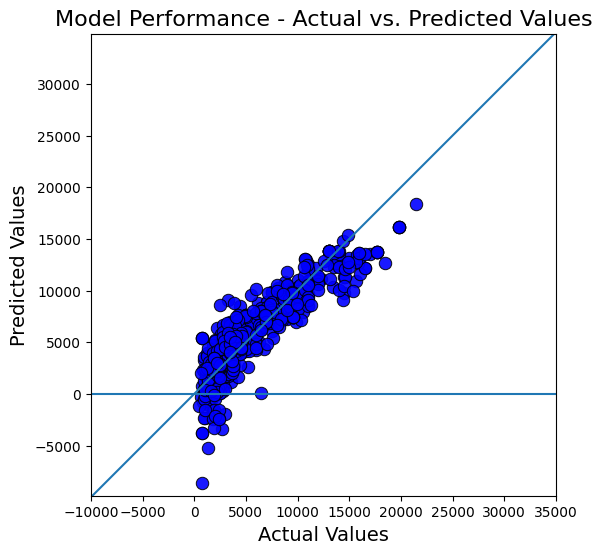

In [ ]:
model_prediction(LinearRegression())

The linear regression model has a 0.80 adjusted R-squared. Nevertheless, the model predicts negative car price for some data points. This makes the model unuseful and unreasonable.

Kernel regression

Root mean squared error: 2303.17
Mean absolute error: 1785.07
R-squared: 0.74
Adjusted R-squared: 0.73


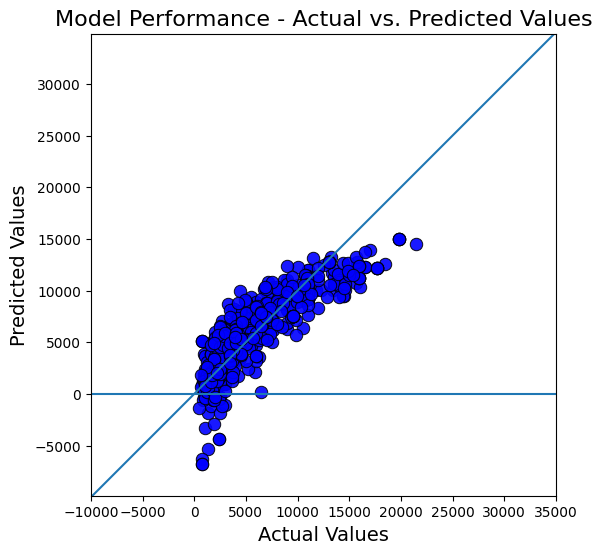

In [ ]:
model_prediction(KernelRidge())

The kernel regression model has a 0.73 adjusted R-squared. It also predicts  negative car price for some data points like the linear regression model. This makes the model unuseful and unreasonable.

Decision tree

Root mean squared error: 1923.90
Mean absolute error: 1100.00
R-squared: 0.82
Adjusted R-squared: 0.81


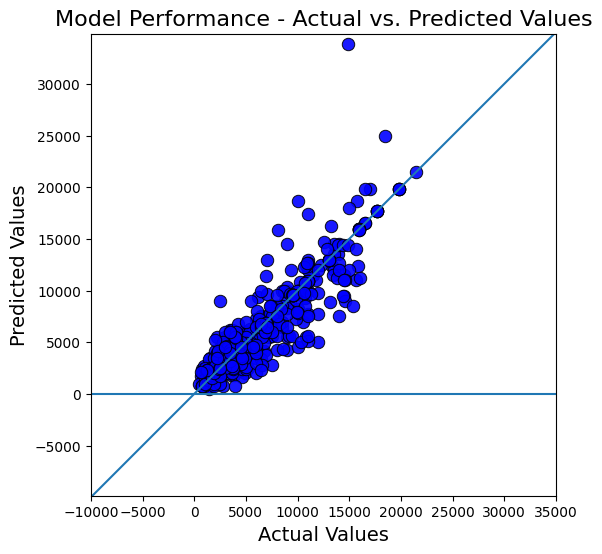

In [ ]:
model_prediction(DecisionTreeRegressor())

The decision tree model has a 0.81 adjusted R-squared which is the similiar to the linear regression models. The model didn't predict negative car price. This means the decision tree may be a better model for this problem compare to linear regression. However, from the plot we can see that there are 2 huge miss prediction in the result. The model tends to gives a higher price prediction. If the model user is a car dealer using this model to estimate how much should spend on the buying client's car, then this result is not acceptable. A better model should be considered.

Random forest

Root mean squared error: 1375.74
Mean absolute error: 845.10
R-squared: 0.91
Adjusted R-squared: 0.90


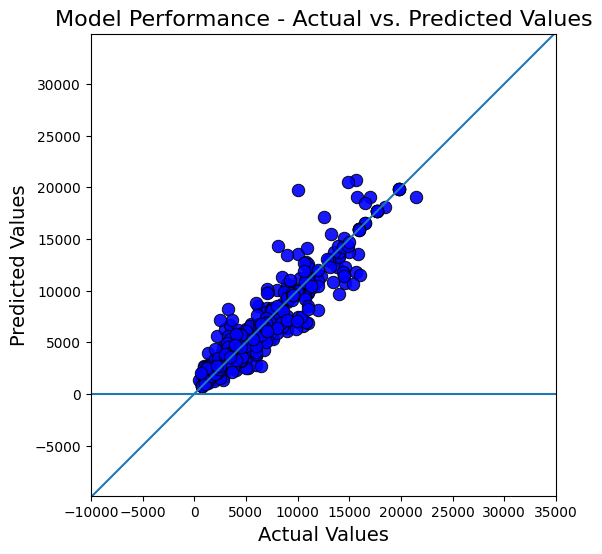

In [ ]:
model_prediction(RandomForestRegressor())

The random forest model has a 0.90 adjusted R-squared which is the highest compare to other models. The model also didn't predict negative car price nor generate large outliers. This random forest model may be the most suitable model for this problem.

AdaBoost

Root mean squared error: 2177.55
Mean absolute error: 1729.85
R-squared: 0.77
Adjusted R-squared: 0.76


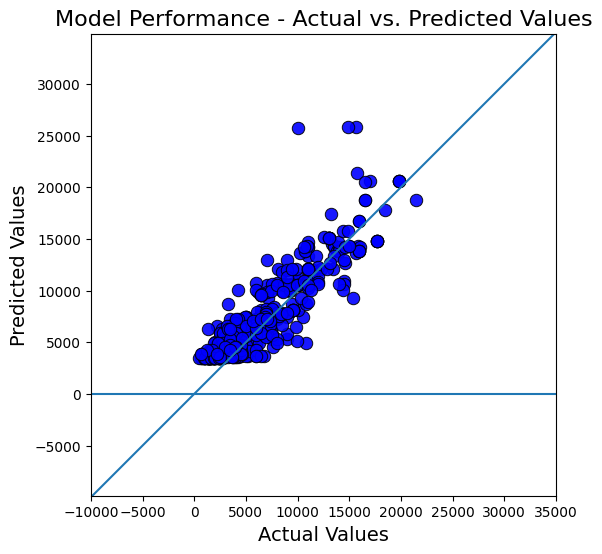

In [ ]:
model_prediction(AdaBoostRegressor())

The AdaBoost model has a 0.76 adjusted R-squared which is low compare to other models. The model seams to introduce a "based price" for all used cars, which is around $2000. Moreover, the model also tend to over estimate the price. Even the adjusted R-squared is low for this model, the based price may be a alternative way to model this used car price problem.

**Modeling with data normalization**

In [ ]:
df1_numericals = df.select_dtypes(['int64','float64'])
numericals = [i for i in df1_numericals.columns]
scaler = StandardScaler()
df[numericals] = scaler.fit_transform(df[numericals])

In [ ]:
df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Emission Class,Service history,Brand,Model
count,2.238000e+03,2.238000e+03,2.238000e+03,2.238000e+03,2.238000e+03,2238.000000,2.238000e+03,2238.000000,2.238000e+03,2.238000e+03,2.238000e+03,2.238000e+03
mean,-5.079841e-17,-1.523952e-16,9.804093e-15,1.269960e-16,-7.619761e-17,0.000000,-3.809881e-16,0.000000,-2.539920e-17,-1.904940e-17,-2.539920e-17,6.349801e-18
std,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223,1.000223e+00,1.000223,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00
min,-1.173364e+00,-2.264461e+00,-4.103642e+00,-1.171462e+00,-1.300174e+00,-2.189594,-1.719937e+00,-1.957982,-4.441024e+00,-4.693437e-01,-1.698830e+00,-1.427600e+00
25%,-7.427510e-01,-6.624288e-01,-7.039101e-01,-5.223579e-01,-1.300174e+00,-0.393073,-6.488649e-01,0.510730,-1.094180e+00,-4.693437e-01,-7.765873e-01,-8.119935e-01
50%,-3.646519e-01,-6.787943e-02,-6.646036e-02,1.267465e-01,6.685602e-01,-0.393073,-6.221599e-03,0.510730,2.143496e-02,-4.693437e-01,2.165975e-01,-1.553471e-01
75%,5.266117e-01,6.186038e-01,7.834727e-01,7.758508e-01,6.685602e-01,0.205768,7.970825e-01,0.510730,1.137050e+00,-4.693437e-01,1.138840e+00,7.714819e-01
max,5.863481e+00,5.261976e+00,2.270856e+00,4.021372e+00,2.637294e+00,2.002289,1.006186e+01,0.510730,1.137050e+00,2.130635e+00,1.351666e+00,2.142915e+00


In [ ]:
X = df.drop(columns=["Price"])
y = df["Price"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
def model_prediction(model):
    model.fit(X_train,y_train)
    X_train_pred = model.predict(X_train)
    X_test_pred = model.predict(X_test)

    n = X_test.shape[0]
    p = X_test.shape[1]
    r2_adj=1-(1-r2_score(y_test, X_test_pred))*(n-1)/(n-p-1)


    # The mean squared error
    print("Root mean squared error: %.2f"
          % sqrt(mean_squared_error(y_test, X_test_pred)))
    # The absolute squared error
    print("Mean absolute error: %.2f"
          % mean_absolute_error(y_test, X_test_pred))
    # Explained variance score: 1 is perfect prediction
    print('R-squared: %.2f' % r2_score(y_test, X_test_pred))

    # Explained adjusted r^2:
    print('Adjusted R-squared: %.2f' % r2_adj)

    # Create a scatterplot
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=X_test_pred, color='b', alpha=0.9, edgecolor='k', s=80)
    plt.axis('equal')
    plt.ylim(-4,6)
    plt.xlim(-4,6)
    plt.axline((0, 0), slope=1)
    plt.xlabel("Actual Values", fontsize=14)
    plt.ylabel("Predicted Values", fontsize=14)
    plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)
    plt.show()


Linear regression

Root mean squared error: 0.42
Mean absolute error: 0.32
R-squared: 0.80
Adjusted R-squared: 0.80


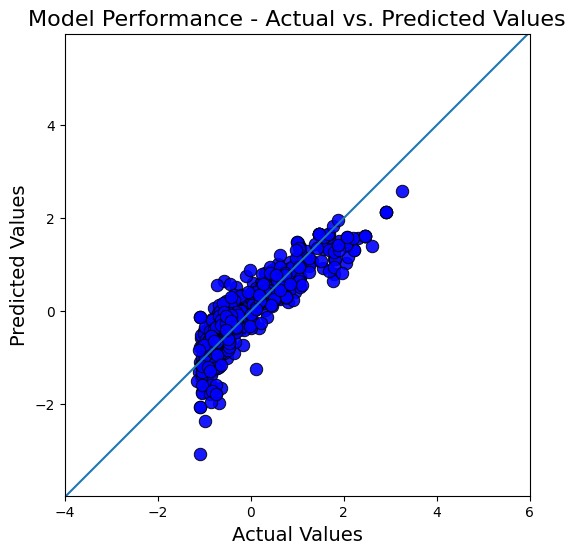

In [ ]:
model_prediction(LinearRegression())

Kernel regression

Root mean squared error: 0.42
Mean absolute error: 0.32
R-squared: 0.80
Adjusted R-squared: 0.80


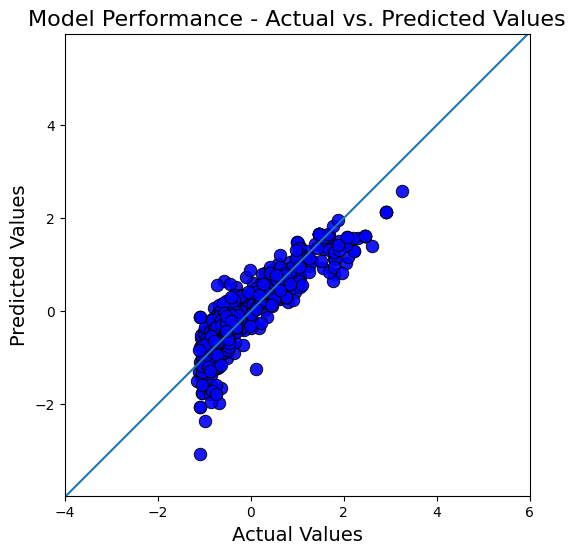

In [ ]:
model_prediction(KernelRidge())

Decision tree

Root mean squared error: 0.41
Mean absolute error: 0.24
R-squared: 0.81
Adjusted R-squared: 0.81


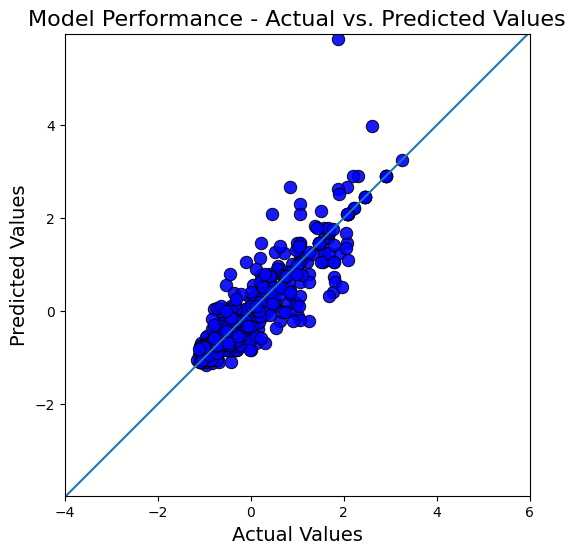

In [ ]:
model_prediction(DecisionTreeRegressor())

Random forest

Root mean squared error: 0.29
Mean absolute error: 0.18
R-squared: 0.91
Adjusted R-squared: 0.91


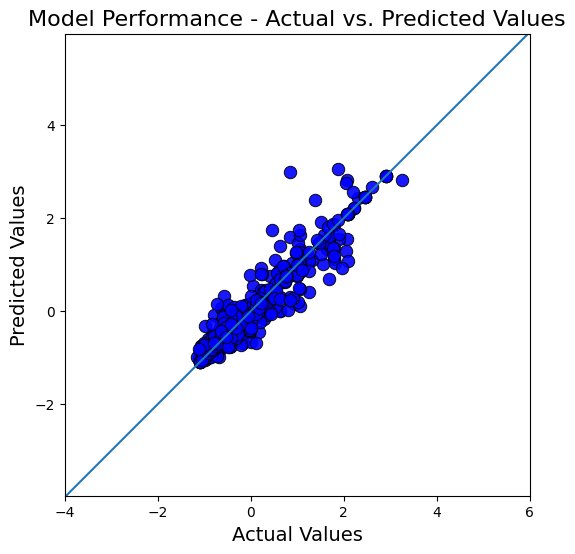

In [ ]:
model_prediction(RandomForestRegressor())

AdaBoost

Root mean squared error: 0.44
Mean absolute error: 0.37
R-squared: 0.78
Adjusted R-squared: 0.78


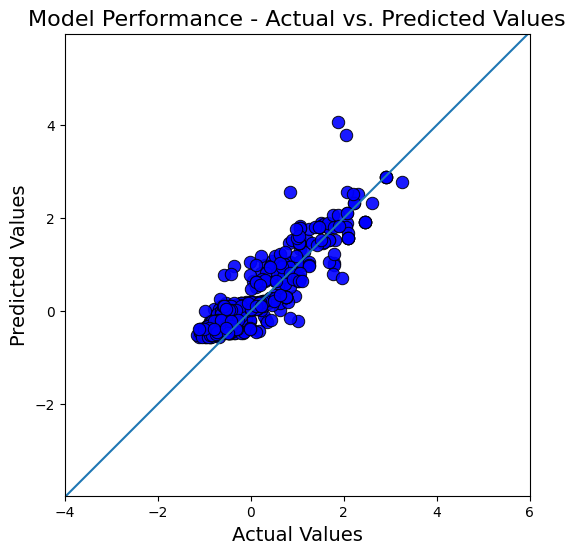

In [ ]:
model_prediction(AdaBoostRegressor())

Compare the adjusted R-squared between each models with and without data normalization, we find that data normalization did not effect the profermance of the model.   

**Discussion and conclusion**

From the result we find that



*   Compare the adjusted R-squared score: Random forest > Decision tree = Linear regression > AdaBoost > kernel regression.

*   Models such as AdaBoost and Decision tree tend to overestimate the price.
*   Random forest model gets the highest adjusted R-squared score amoung all models and has the best perfomance.
*   Linear regression model pridicts negative prices for used cars, which is not reasonable.
*   The AdaBoost model seams to introduce a "based price" for all used cars, which is around $2000. This could be a good point for future study.
*   Doing data normalization or not will not affect the result for this problem.
*   For future studies, how to avoid overestimate may be a challenging problem.  

*   Models such as locally weighted regression, logarithmic regression,  polynomial regression and neural network are not tried in this homework. These model could be investigate in future studies.
*   The ANOVA result is analyzed generally based on the EDA result obtained from homework 5. Future studies may try ANOVA on each models to fine tune their details.
